## 实验：CLAHE 直方图均衡

### 实验概述

限制对比度自适应直方图均衡化（CLAHE）尽管是一种简单的算法，但却是一种非常强大的工具，可以在不过度放大噪声（你经常在夜间照片中看到的“颗粒”）的情况下从图像中检索隐藏的细节。它的作用是将整个图像分成小段，并均衡每个段的直方图。为了使图像平滑，通过双线性插值来减小块区域的可见性。此算法在一个方向（例如：水平）上进行线性插值，然后在另一方向（例如：垂直）上进行线性插值。

我们基于下面的灰度图像来理解 CLAHE 工作步骤：

![](./img/13.jfif)

我们必须首先将其划分为块，以限制像素强度的动态范围。根据所选的块大小，稍后会进行裁剪和重新分配灰度峰值。 

选择 `6x6` 的块大小，以便每个块具有 `6x6 = 36` 像素：

![](./img/14.jfif)

我们需要找到每个块的中心点，称为网格点。网格点在下图中显示为黄点：

![](./img/15.jfif)

首先，如果块的原始直方图超过了预定义的峰值（也称作：**限幅值/阈值**），则会从顶部对其进行裁剪（**注意：不是丢弃**）。

之后，裁剪出来的部分，将被均匀分布在直方图的整个像素范围内：

![](./img/16.jfif)

这种均匀的分布将使剪切区域再次略微超过剪切极限（上图的浅绿色部分）。

为了解决这个问题，迭代地重复削波过程，直到只有可忽略的部分保持在该极限以上。

然后，根据该块区域的裁剪后的直方图，对块内的每个像素进行转换。其中，转换函数的斜率控制着要进行多少对比度放大。由于对块的每个像素执行转换函数转换，需要经历大量的计算，因此，仅对网格点（中心像素）执行此操作，并且根据该中心像素通过插值对块的其余像素进行转换。

#### CLAHE 直方图均衡化实现

要使用 OpenCV 将 CLAHE 应用于 Python 中的图像，首先，需要创建一个 CLAHE 对象。该命令如下：

```python
clahe = cv2.createCLAHE(clip_limit, block_size)
```

- **`clip_limit`：** 告诉函数，应该裁剪掉多少直方图峰。如果其值为 `1`，则不进行任何裁剪。通常，它保持为 `2` 或 `3`。阈值越高，局部对比度放大的越多。

- **`block_size`：** 这是您要将图像划分为的块的大小。

创建 CLAHE 对象后，可以使用以下命令使用它在任何灰度图像上应用 CLAHE：

```python
img_out = clahe.apply(img_in)

```
此处 `img_in` 是输入图像，而 `img_out` 是 CLAHE 操作之后的变换图像。下面，通过实验验证上面的理论 ——

### 实验目标

在本实验中，我们将读取灰度图像，绘制具有 256 个 bin 的 2D 直方图。

之后，我们将对其应用 CLAHE，然后绘制所得图像的直方图。

最后，我们将比较通过 CLAHE 转换后的图像，与通过简单直方图均衡增强后图像的效果。

### 1. 导入依赖库

In [1]:
import cv2                         # 导入OpenCV
import matplotlib.pyplot as plt   # 导入matplotlib

# 魔法指令，使图像直接在Notebook中显示
%matplotlib inline

### 2. 使用灰度模式读取图像

使用 `cv2.imread` 函数读取图像，同时，使用 `cv2.IMREAD_GRAYSCALE` 的选项，它指定以灰度模式加载图像。

另外，我们可以为此标志传递整数值 `0`，得到同样的效果。

In [2]:
# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab3/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

# 通过传递整数0给cv.imread函数，实现启用灰度模式读取图像
img= cv2.imread('./data/dark_image1.png', 0) 

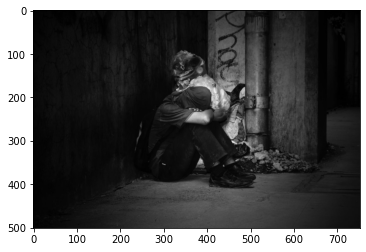

In [3]:
# cv2.imshow('Original Image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# 将图像转换为RGB模式
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
# 显示图像
plt.show()                                       

### 3. 绘制 256 Bins 直方图

绘制具有 256 个 bin 的原始图像 `img` 的直方图：

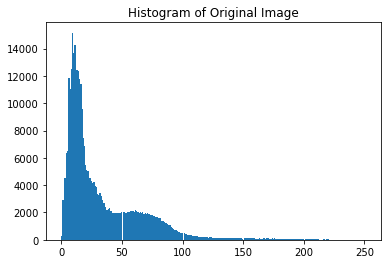

In [4]:
# 提供包含所有排列的图像像素的向量，并指定bins为256
ax = plt.hist(img.ravel(), bins= 256)      
# 指定图形标题
plt.title('Histogram of Original Image')   
# 显示图像
plt.show()                                 

### 4. 创建 CLAHE 对象

创建一个 CLAHE 对象。 让我们将剪辑限制设置为 `3`，将网格大小设置为 `8x8`。您可以根据需要更改以下参数，并观察不同的效果：

In [5]:
# 创建一个阈值为3，网格尺寸为8x8的CLAHE对象
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8)) 

### 5. 执行 CLAHE 直方图均衡

In [6]:
# 执行CLAHE直方图均衡，应用对象是原图像img，输出为out
out = clahe.apply(img) 

显示图像结果：

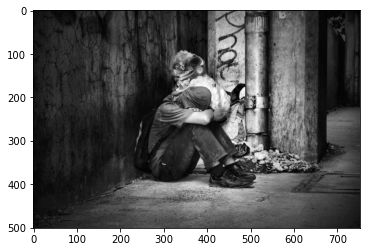

In [7]:
# cv2.imshow('CLAHE image', out)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# 将图像转换为RGB模式
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB)) 
# 显示图像
plt.show()                                       

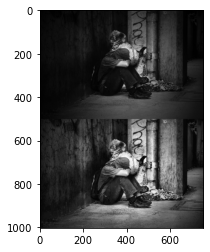

In [12]:
import numpy as np
img_out = np.vstack((img,out))
plt.imshow(img_out,"gray")
plt.show()

### 6. 绘制 CLAHE 图像的直方图

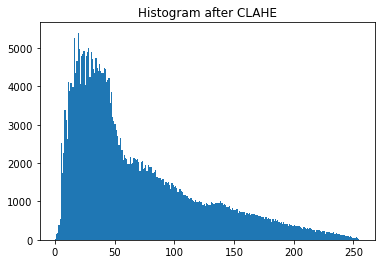

In [13]:
# 提供包含所有排列的图像像素的向量，并指定bins为256
ax = plt.hist(out.ravel(), bins= 256)       
# 指定图形标题
plt.title('Histogram after CLAHE')          
# 显示图像
plt.show()                                  

### 实验小结

在本实验中，您掌握了如何将 CLAHE 应用于图像，并观察其结果与简单的直方图均衡化有何不同。

另外，可以看出，在 CLAHE 之后，直方图的基本形状得以保留，只是在可能的像素强度的 `0-255` 范围内实现平滑化延伸。

与通过简单直方图均衡获得的直方图的形状形成鲜明对比的是，不仅直方图延伸到 `0-255` 范围，而且其中存在的尖锐的峰值也消失了。

**最后，我们鼓励您通过更换不同的 CLAHE 对象参数（阈值和区块大小），来观察 CLAHE 直方图均衡化的效果，进一步发现优化的空间。**

下面是我们使用其他的阈值和区块大小后，CLAHE 直方图均衡化的大致效果参考 ——

#### 区块不变 ，调整阈值

- 区块设置 `8x8`，阈值为 `3`（本实验参数）效果如下：

![](./img/17.jfif)

- 区块设置 `8x8`，阈值为 `6` 效果如下：

![](./img/18.jfif)

- 区块设置 `8x8`，阈值为 `12` 效果如下：

![](./img/19.jfif)

#### 阈值不变 ，调整区块

- 阈值为 `3`，区块设置 `16x16` 效果如下：

![](./img/20.jfif)

- 阈值为 `3`，区块设置 `32x32` 效果如下：

![](./img/21.jfif)

- 阈值为 `3`，区块设置 `128x128` 效果如下：

![](./img/22.jfif)

由此可以得出结论，增加阈值，会引入更高的对比度，使图像区域更明亮，而增加块大小，会提升边缘的锐度。

是否使用直方图均衡或 CLAHE 完全取决于您拥有的数据类型以及要关注的信息类型。CLAHE 通常是一个不错的起点。应用 CLAHE 之后，您可以对结果应用直方图均衡化。最重要的是，您需要花一些时间来处理数据，调整参数。尝试对它应用不同的增强过程，然后自己确定最有效的方法。盲目地采用任何一种研究方法的技术都不会给您带来一劳永逸的效果 —— 正如您应用修图软件内置的美图、美颜效果工具，因为对一张图片有效的效果，可能对另一张图片就无效了。